# Convolutional Neural Networks

## Image Classification using framework Caffe and Nvidia Digits
---
Caffe: https://github.com/BVLC/caffe

Digits: https://github.com/NVIDIA/DIGITS

---
[Caffe DEMO](http://demo.caffe.berkeleyvision.org/)

In [6]:
# Setup environment
caffe_root = '/usr/local/caffeDigits/'


import sys
sys.path.insert(0, caffe_root + 'python')

## Network Structure for a Convolutional Neural Network

<img src="imagenes/mylenet.png">

Convolutional neural networks are inspired in brain's visual cortex. About them we know they have a complex array of cells which are sensitive to small regions in a larger visual field. These small regions cover the entire field of vision. These cells act as local filters and are designed to exploit the spatial relation present in natural images.

* Tipically, a convolutional network has the following layers.

  * Convolutional Layer
  * Non-linearity Layer
  * Pooling Layer
  * Fully Connected Layer
  
---

## Convolutional Layer

<img src="imagenes/convolutional_layer.png" align=center>

The Convolutional Layer consists of a group of filters.

These are small receptive fields that we convolve to the length and width of the input image, producing a map of features.

### a. Local Connectivity

<img src="imagenes/local_connected.png" width=70%>

This characteristic consists in connecting each neuron in the convolutional layer with a small region from the input image, but connected to all color channels.

This region is called **receptive field (F)**.

### b. Spatial Arrangement

Consists of 3 hiperparameters that control the output of our convolutional network.

1. **Depth:** Controls the number of neurons in a convolutional network that are connected to the same region in the input image. We will refer to this group of neurons as a **depth column**.

2. **Stride (S):** This parameter specifies the "step" with which we allocate receptive fields to create a depth column.

3. **Padding (P):** Sometimes it will be convenient to pad the input with zeros spatially on the border of the input volume.

The output of a convolutional layer it's computed as follows:

\begin{equation}
  W_{output} = [(W_{input}- F + 2P)/S + 1] 
\end{equation}

\begin{equation}
  H_{output} = [(H_{input} - F + 2P)/S + 1 ]  
\end{equation}

Therefore, if we have the following input:

\begin{equation}
  Input = 227_{width} * 227_{height} * 3_{rgb}
\end{equation}

...and define hyperparameters:

\begin{align}
  Field = 11\\
  Depth = 96\\
  Stride = 4\\
  Padding = 0
\end{align}

Our output has the following dimensions.

\begin{equation}
  Output = 55_{width} * 55_{height} * 96_{neurons}
\end{equation}

<img src="imagenes/conv_out_1.png">


### c. Shared weights and bias

At this point each neuron in our convolutional network has $1$ bias and $11$x$11$ weights connnected to a receptive field.

Since natural images have **stationary** properties, therefore characteristics learned in a sub-region of an image are useful in a different sub-region.

It turns out we can use the same bias and $11$x$11$ weights in all neurons from the first neuron layer to look for learned features for instance a diagonal, or a horizontal line, in the entire image. And we will use different weights in other neuron layers to search for different features.

<img src="imagenes/conv_out_2.png" >

Once finished our training this $96$ weights of $11$x$11$ learn simple features from our dataset.

<img src="imagenes/features_conv1.jpg" width=250>

---


## Non-linearity Layer

We can define the output of a layer in a neural network as $\bar o$ which would be the output of an activation function applied to the matrix multiplication of

$\bar x=\begin{bmatrix}x_1\\x_2\\.\\.\\x_3\\x_4\end{bmatrix}$ and the layer weights 
$W=\begin{bmatrix}w_{00} & w_{01} & . & . & w_{0n} & b_0\\
                  w_{10} & w_{11} & . & . & w_{1n} & b_1\\
                  . & . & . & . & . & .\\
                  w_{n0} & w_{n1} & . & . & w_{nn} & b_n\\\end{bmatrix}$ therefore $\bar o = f(W\bar x)$
                  
We can prove that if we use a **linear** activation, then a neural network with two layers will be as follows:

$\bar o_1 = W_1\bar x$

$\bar o_2 = W_2\bar o_1 = W_2W_1\bar x$

This means that adding more layers will make our network more complex and slow, but we are not increasing its representational power. To solve this issue we introduce a **non-linearity** layer into the system.

<img src="imagenes/relu.png" style="float: left">
<img src="imagenes/sigmoid.png" style="float: left" width=300>
<img src="imagenes/tanh2.png" style="float: left" width=300>



---

## Pooling Layer

This layer's function is reduce the output's size received from the previous convolutional layer to decrease the spatial size and reduce training time for our network.

\begin{equation}
  W_{output} = [(W_{input}- F)/S + 1] 
\end{equation}

\begin{equation}
  H_{output} = [(H_{input}- F)/S + 1] 
\end{equation}

\begin{equation}
  D_{input} = D_{output}
\end{equation}
<br>

<div style="float: right">
<img src="imagenes/conv_out_1.png" style="float: left">
<img src="imagenes/pool_out_1.png" style="float: left" width=20%>
</div>


<img src="imagenes/pooling.png" width=50%>

As well as a convolutional layer, the pooling layer receives parameters a receptive field $F$ and a stride $S$.

Often a small receptive field is used, given that a larger receptive field will be too destructive for a network.

---

## Fully Connected Layer

Finally, after several convolutional layers, non-linearity layers and possibly pooling layers, the high level reasoning in our network is done by fully connected layers. These connect all neurons from a previous layer (convolutional, pooling or other fully connecteds) and connects them to all its neurons.

<img src="imagenes/fully_connected.gif">

The last fully connected layer in image classification has the same number of neurons as classes in our training dataset.

---

# Simple steps for training a CNN

1. Choosing a dataset.
2. Create a network structure.
3. Define neural net parameters to guide training.
4. Train a network and evaluate performance with a validation dataset.


## 1. Choosing a Dataset

In this tutorial we are using **Cifar 10**, this is a common practice dataset which contains differents animals and things in 10 classes. Cifar 10 contains 60000 images of 32x32 pixels. For this exercise we are using 25000 in a training dataset and 25000 for validation.

<img src="imagenes/cifar_10.png">


### 1.1 Convert dataset to lmdb

* A file with a path for all images and a category they belong. 

        image_001.jpg 0
        image_002.jpg 1
        image_003.jpg 1
        image_004.jpg 2
        image_005.jpg 2
        image_006.jpg 0
        image_007.jpg 3
        image_008.jpg 4

* All images **must** have the same size.

* We convert these images to LMDB to improve access time for CAFFE.

In [5]:
%%bash
#!/usr/bin/env sh

# Path where LMDB files will be stored.
OUTPUT=/bigdata/drueda/datasets/cifar10

# Path where our files with all image path are found
DATA=/bigdata/drueda/datasets/cifar10

# Caffe Root
CAFFE_ROOT=/usr/local/caffeDigits

# Ruta de la carpeta TOOLS en la instalación de Caffe
TOOLS=/usr/local/caffeDigits/build/tools

TRAIN_DATA_ROOT=$DATA/cifar_original/
VAL_DATA_ROOT=$DATA/cifar_original/

echo "Creating train lmdb..."

GLOG_logtostderr=1 $TOOLS/convert_imageset \
    --shuffle \
    $TRAIN_DATA_ROOT \
    $DATA/train.txt \
    $OUTPUT/cifar_train_lmdb

echo "Creating val lmdb..."

GLOG_logtostderr=1 $TOOLS/convert_imageset \
    --shuffle \
    $VAL_DATA_ROOT \
    $DATA/val.txt \
    $OUTPUT/cifar_val_lmdb

echo "Done."

Creating train lmdb...
Creating val lmdb...
Done.


I1111 17:05:28.106338 23920 convert_imageset.cpp:79] Shuffling data
I1111 17:05:32.679667 23920 convert_imageset.cpp:82] A total of 25000 images.
I1111 17:05:32.688823 23920 db.cpp:34] Opened lmdb /bigdata/drueda/datasets/cifar10/cifar_train_lmdb
E1111 17:05:34.193900 23920 convert_imageset.cpp:143] Processed 1000 files.
E1111 17:05:35.663713 23920 convert_imageset.cpp:143] Processed 2000 files.
E1111 17:05:37.188457 23920 convert_imageset.cpp:143] Processed 3000 files.
E1111 17:05:38.707995 23920 convert_imageset.cpp:143] Processed 4000 files.
E1111 17:05:40.214625 23920 convert_imageset.cpp:143] Processed 5000 files.
E1111 17:05:41.691234 23920 convert_imageset.cpp:143] Processed 6000 files.
E1111 17:05:43.128396 23920 convert_imageset.cpp:143] Processed 7000 files.
E1111 17:05:44.611275 23920 convert_imageset.cpp:143] Processed 8000 files.
E1111 17:05:46.136216 23920 convert_imageset.cpp:143] Processed 9000 files.
E1111 17:05:47.603260 23920 convert_imageset.cpp:143] Processed 10000

---

## 2. Caffe's Network Structure

<img src="imagenes/net1.png">

### 2.1 Data Layer 

``` python
                layer {
                  name: "data"
                  type: "Data"
                  top: "data"
                  top: "label"
                  include {
                    phase: TRAIN
                  }
                  transform_param {
                    # mean_file: "mean.binaryproto"
                    # mirror: true
                    # crop_size: 28
                    # scale: 0,00390625
                  }
                  data_param {
                    source: "cifar_train_lmdb"
                    batch_size: 512
                    backend: LMDB
                  }
                }
```

```python



```

### 2.2 Convolution Layer



<img src="imagenes/convolution_text.png" align=left>
<img src="imagenes/convolutional_layer.png" width=50%>

### 2.3 Rectified Linear Layer

<img src="imagenes/relu_text.png" align=left>
<img src="imagenes/relu.png" >

### 2.4 Pooling Layer


<img src="imagenes/pooling_text.png" align=left>
<img src="imagenes/pooling.png" width=70%>

### 2.5 Fully Connected Layer

<img src="imagenes/fully_connected_text.png" align=left>
<img src="imagenes/fully_connected.gif">

---

## 3. Define neural net parameters to guide training.


``` python

# How many images are we using in a single forward step
# To cover all images this must be true: batch_size * test_iter > test images
test_iter: 250
# Every n intervals perform a validation to our network.
test_interval: 100 

# Every n intervals display cost function in our training dataset.
display: 50
# Max number of iterations.
max_iter: 1000 

# Learning Rate
base_lr: 0.0001
# Learning policies.
lr_policy: "step"
stepsize: 250
gamma: 0.1
# Regularization parameters.
momentum: 0.9
weight_decay: 0.0005

# Every n intervals save our training in a snapshot
snapshot: 500
snapshot_prefix: "snapshot"
# Network's Path
net: "train_val.prototxt"
# Solver mode
solver_mode: GPU # CPU o GPU
solver_type: SGD # SGD, NAG y Adagrad

```

---
## 4. Train a network and evaluate performance.



In [7]:
!$caffe_root/build/tools/caffe train \
    --solver=train_caffe/solver.prototxt \
    --gpu 0

I1111 17:11:23.337788 24694 caffe.cpp:155] Using GPUs 0
I1111 17:11:27.964579 24694 solver.cpp:33] Initializing solver from parameters: 
test_iter: 250
test_interval: 100
base_lr: 0.0001
display: 50
max_iter: 1000
lr_policy: "step"
gamma: 0.1
momentum: 0.9
weight_decay: 0.0005
stepsize: 1000
snapshot: 500
snapshot_prefix: "snapshot"
solver_mode: GPU
device_id: 0
random_seed: 1989
net: "./train_caffe/train_val.prototxt"
solver_type: SGD
I1111 17:11:27.964735 24694 solver.cpp:81] Creating training net from net file: ./train_caffe/train_val.prototxt
I1111 17:11:27.966228 24694 net.cpp:316] The NetState phase (0) differed from the phase (1) specified by a rule in layer data
I1111 17:11:27.966284 24694 net.cpp:316] The NetState phase (0) differed from the phase (1) specified by a rule in layer accuracy
I1111 17:11:27.966490 24694 net.cpp:47] Initializing net from parameters: 
state {
  phase: TRAIN
}
layer {
  name: "data"
  type: "Data"
  top: "data"
  top: "label"
  include {
    phase: T

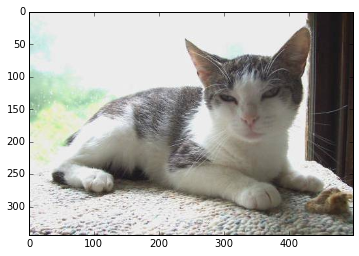

<Container object of 10 artists>

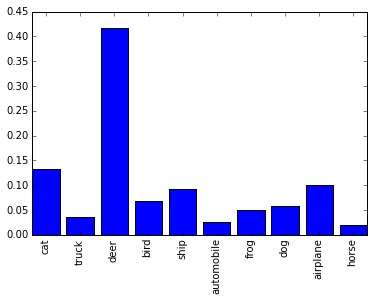

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

# Import caffe's python interface
import caffe


# Load a trained model
caffe.set_mode_gpu()
MODEL_FILE='train_caffe/deploy.prototxt'
PRETRAINED='snapshot_iter_1000.caffemodel'

net = caffe.Classifier(MODEL_FILE, PRETRAINED, 
                       raw_scale=255,
                       image_dims=(32, 32))

# Using a test image.
input_image = caffe.io.load_image('imagenes/cat.jpg')
prediction = net.predict([input_image])
labels=['cat','truck','deer','bird','ship','automobile','frog','dog','airplane','horse']

image = mpimg.imread("imagenes/cat.jpg")
plt.imshow(image)
plt.show()
plt.xticks(range(10), labels, rotation='vertical')
plt.bar(range(10), prediction[0], align='center')


---

# Diagnose and improve our model with DIGITS

---

<img src="imagenes/cat.jpg">

---

## 1. First Training

In our first training we are using the simple network example trained formerly with Caffe, in this training we are not using any kind of preprocessing and our network is rather shallow.

We can conclude from Digits output that our network has not enough power to represent the classes present in our network this is understood when we check training and validation cost function's behavior in Digits since both our far from our objective which is zero, thus we have an underfitting problem. 

<img src="imagenes/red1.png">

<img src="imagenes/acc1.jpg" align=left width=40%>

<img src="imagenes/mat1.png" width=600>

---

## 2. Second training.

In order to improve our results, we are going to preprocess our data without modifying our network's structure.
This preprocessing is mean substraction, which in color images help us reduce light conditions in our images.

From Digit's behavior graphic and a generated confusion matrix we can see our network has a better classification accuracy, however our network is still underfitting.

<img src="imagenes/red2.png">

<img src="imagenes/acc2.jpg" align=left width=40%>

<img src="imagenes/mat2.png" width=600>

---

## 3. Third Training

In our third training we want to reduce underfitting in the network, therefore we are adding a second convolutional layer to improve our network's representation power.

Studying our behavior graphics we can conclude that a deeper representation helps reduce underfitting.

<img src="imagenes/red3.png">

<img src="imagenes/acc3.jpg" align=left width=40%>

<img src="imagenes/mat3.png" width=600>


---

## 4. Fourth training.

For this training we want to use a deeper network, since we can reduce underfitting in such manner.

Our behavior graphic show us that with this structure we are improving our classification accuracy and our training function cost show us that this network has learned to represent perfectly our training dataset, however for the validation dataset its cost function is growing further from our fitting objective (zero), this is an overfitting problem and it means our network cannot classify images it has not seen.

<img src="imagenes/red4.png">

<img src="imagenes/acc4.jpg" align=left width=40%>

<img src="imagenes/mat4.png" width=600>

---

## 5. Fifth training.

In our last training we are atacking this overfitting problem, therefore we are using two different techniques.
Firstly, we want to increase our training images which is an easy way to reduce overfitting for this we use a mirroring technique to double our images. Additionally, we our using another regularization method called Dropout that will disconnect with a 50% chance our fully connected neurons.



<img src="imagenes/red5.png">

<img src="imagenes/acc5.jpg" align=center>

<img src="imagenes/mat5.png" align=center width=70%>